In [1]:
import matplotlib.pyplot as plt

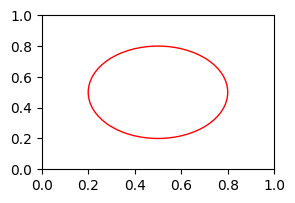

In [18]:
fig, ax = plt.subplots(figsize=(3,2))
c = plt.Circle((0.5, 0.5), 0.3, edgecolor="red", facecolor="none")
ax.add_artist(c)
#ax.autoscale_view()

In [13]:
type(c).__mro__

(matplotlib.patches.Circle,
 matplotlib.patches.Ellipse,
 matplotlib.patches.Patch,
 matplotlib.artist.Artist,
 object)

# Aspect Ratio

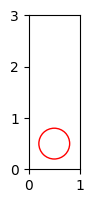

In [23]:
fig, ax = plt.subplots(figsize=(3,2))
ax.set_ylim(0,3)
c = plt.Circle((0.5, 0.5), 0.3, edgecolor="red", facecolor="none")
ax.add_artist(c)
ax.set_aspect(1) # how much y per x

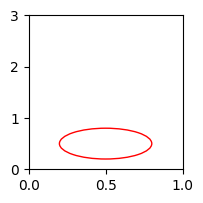

In [26]:
fig, ax = plt.subplots(figsize=(3,2))
ax.set_ylim(0,3)
c = plt.Circle((0.5, 0.5), 0.3, edgecolor="red", facecolor="none")
ax.add_artist(c)
ax.set_aspect(1/3)

# Transformers Control Coordinate Reference Systems (CRS)

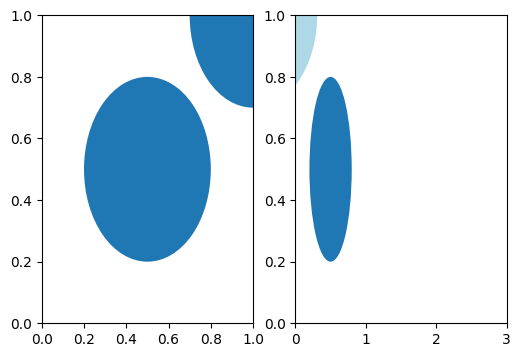

In [46]:
# 1. transData
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,4))
ax2.set_xlim(0,3)

# left
c = plt.Circle((0.5,0.5), 0.3, transform=ax1.transData)
ax1.add_patch(c)

# right
c = plt.Circle((0.5,0.5), 0.3) # default is transform=ax2.transData
ax2.add_patch(c)


# transform with ax1, add to ax1
c = plt.Circle((1,1), 0.3, transform=ax1.transData)
ax1.add_patch(c) # cropped by ax1
# transform with ax1, add to ax2
c = plt.Circle((1,1), 0.3, transform=ax1.transData, color="lightblue")
ax2.add_patch(c) # cropped by ax2

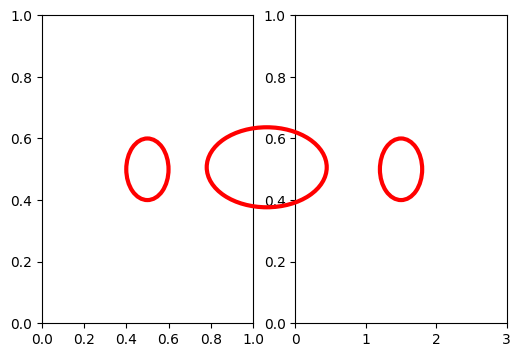

In [51]:
# 2. transAxes+transFigure (0,0 is bottom left, 1,1 is top right)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,4))
ax2.set_xlim(0,3)

# left
c = plt.Circle((0.5,0.5), 0.1, transform=ax1.transAxes, edgecolor="red", facecolor="none", linewidth=3)
ax1.add_artist(c)

# right
c = plt.Circle((0.5,0.5), 0.1, transform=ax2.transAxes, edgecolor="red", facecolor="none", linewidth=3)
ax2.add_artist(c)

# fig
c = plt.Circle((0.5,0.5), 0.1, transform=fig.transFigure, edgecolor="red", facecolor="none", linewidth=3)
fig.add_artist(c)

In [60]:
%config InlineBackend.print_figure_kwargs

{'bbox_inches': 'tight'}

In [61]:
%config InlineBackend.print_figure_kwargs={'bbox_inches': None}

100.0


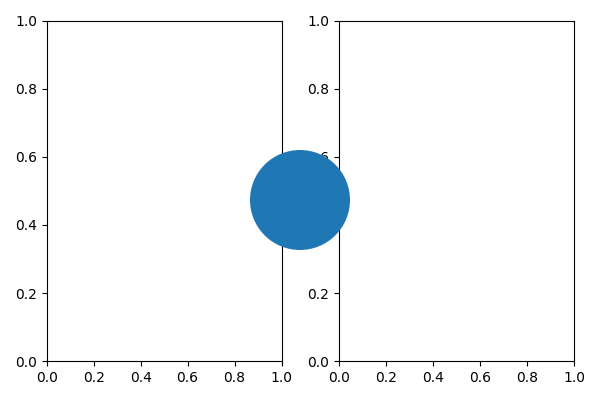

In [63]:
# 3. none (raw pixels)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,4))
print(fig.dpi) # dots per inch

plt.tight_layout() # matplotlib crops correctly, unlike Jupyter

width = 6*fig.dpi
height = 4*fig.dpi
x = width/2
y = height/2

c = plt.Circle((x,y), 50, transform=None)
fig.add_artist(c)
fig.savefig("temp.png")

100.0


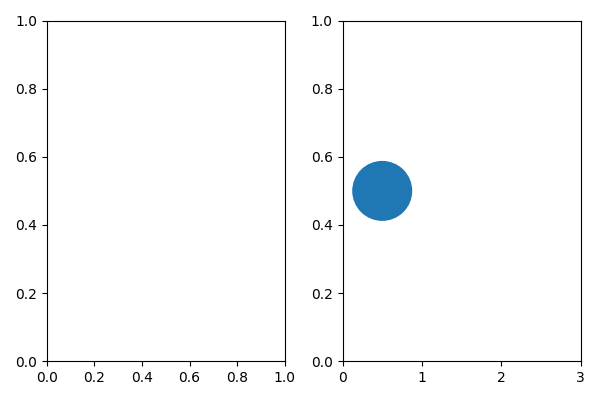

In [75]:
# 4. mix and match
# GOAL: draw a visual circle (radius=30 pixels) at a data coordinate (0.5,0.5 on the right)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,4))
ax2.set_xlim(0,3)
print(fig.dpi) # dots per inch

plt.tight_layout() # don't crop after any .transform calls!

x, y = ax2.transData.transform((0.5,0.5))
c = plt.Circle((x,y), 30, transform=None)
fig.add_artist(c)

# TODO: create a scatter plot with angles

In [90]:
import matplotlib
import pandas as pd
import math

In [91]:
a = math.radians(90)
y_diff = math.sin(a)
y_diff

1.0

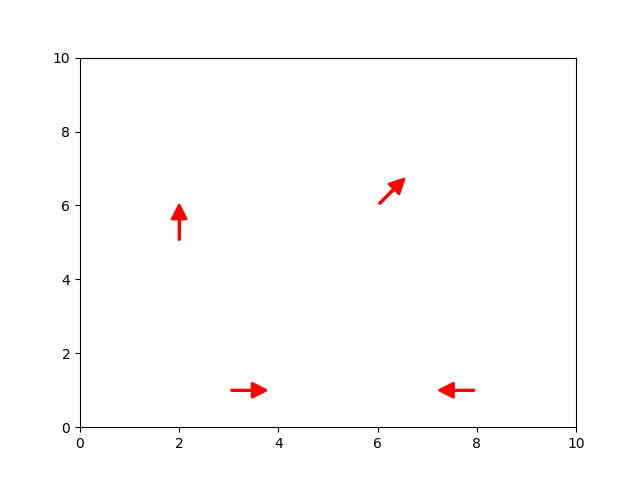

In [93]:
df = pd.DataFrame([
    {"x":2, "y":5, "a": 90},
    {"x":3, "y":1, "a": 0},
    {"x":6, "y":6, "a": 45},
    {"x":8, "y":1, "a": 180}
])

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

for row in df.itertuples():
    # v1: draw circles
    x, y = ax.transData.transform((row.x, row.y))
    #c = plt.Circle((x,y), 10, transform=None)
    #ax.add_artist(c)
    
    # v2: draw arrows with correct angle
    a = math.radians(row.a)
    y_diff = math.sin(a) * 40
    x_diff = math.cos(a) * 40
    arrow = matplotlib.patches.FancyArrowPatch((x,y), (x+x_diff, y+y_diff), transform=None,
                                               color="r", linewidth=2,
                                               arrowstyle="simple,head_width=10,head_length=10")
    ax.add_artist(arrow)

In [89]:
df

,x,y,a
0,2,5,90
1,3,1,0
2,6,6,45
3,8,1,180
